In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans, AffinityPropagation, DBSCAN, AgglomerativeClustering
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import davies_bouldin_score, rand_score, silhouette_score, fowlkes_mallows_score, make_scorer
from scipy.cluster import hierarchy
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Задание №1

# Генерация датасетов

In [3]:
#from sklearn.datasets import make_classification, make_blobs

In [4]:
#X1, Y1 = make_classification(n_samples=500, n_classes=2, n_features=3, n_redundant=0, n_clusters_per_class=1)

In [5]:
#X2, Y2 = make_blobs(n_samples=300, n_features=5, centers = 3, cluster_std=1.2)

In [6]:
#X3, Y3 = make_blobs(n_samples=300, n_features=8, centers = 5, cluster_std=0.75)

In [7]:
#pd.DataFrame(data=X1).to_csv('../data/Lab6_X1.csv', index=False)
#pd.DataFrame(data=Y1).to_csv('../data/Lab6_Y1.csv', index=False) 
#pd.DataFrame(data=X2).to_csv('../data/Lab6_X2.csv', index=False) 
#pd.DataFrame(data=Y2).to_csv('../data/Lab6_Y2.csv', index=False) 
#pd.DataFrame(data=X3).to_csv('../data/Lab6_X3.csv', index=False) 
#pd.DataFrame(data=Y3).to_csv('../data/Lab6_Y3.csv', index=False) 

In [8]:
X1 = pd.read_csv('../data/Lab6_X1.csv')
Y1 = pd.read_csv('../data/Lab6_Y1.csv') 
X2 = pd.read_csv('../data/Lab6_X2.csv')
Y2 = pd.read_csv('../data/Lab6_Y2.csv')
X3 = pd.read_csv('../data/Lab6_X3.csv')
Y3 = pd.read_csv('../data/Lab6_Y3.csv')

In [9]:
X1 = X1.to_numpy()
Y1 = Y1.to_numpy()
X2 = X2.to_numpy()
Y2 = Y2.to_numpy()
X3 = X3.to_numpy()
Y3 = Y3.to_numpy()

In [10]:
Y1 = np.array(Y1).flatten()

In [11]:
Y2 = np.array(Y2).flatten()

In [12]:
Y3 = np.array(Y3).flatten()

# Визуализация

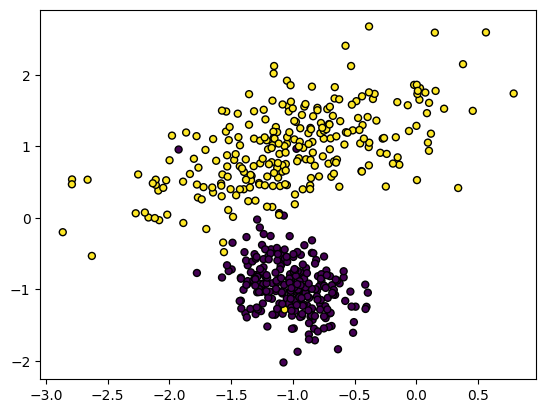

In [13]:
plt.scatter(X1[:, 0], X1[:, 1], marker="o", c=Y1, s=25, edgecolor="k")
plt.show()

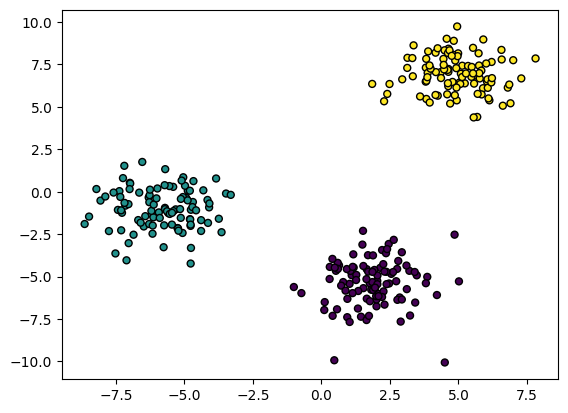

In [14]:
plt.scatter(X2[:, 0], X2[:, 1], marker="o", c=Y2, s=25, edgecolor="k")
plt.show()

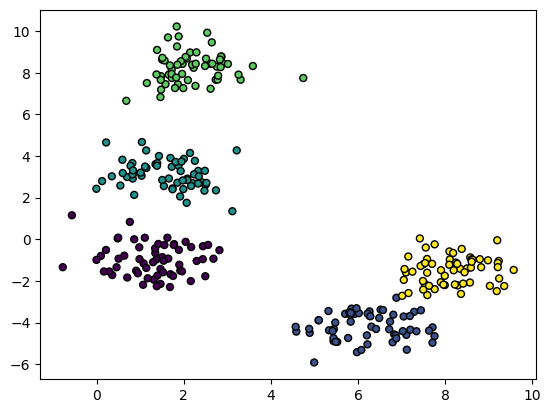

In [15]:
plt.scatter(X3[:, 0], X3[:, 1], marker="o", c=Y3, s=25, edgecolor="k")
plt.show()

# Вспомогательные функции

In [16]:
def metrics(name, model, X, Y): 
        print(name)
        print('\nВнутренние метрики')
        try:
            print('Силуэт:', silhouette_score(X, model.predict(X)))
            print('Индекс Дэвиса-Болдуина:', davies_bouldin_score(X, model.predict(X)))
            print('\nВнешние метрики')
            print('Индекс RAND:', rand_score(Y, model.predict(X)))
            print('Индекс Фоулкса – Мэллова', fowlkes_mallows_score(Y, model.predict(X)))
        except:
            print('Силуэт:', silhouette_score(X, model.labels_))
            print('Индекс Дэвиса-Болдуина:', davies_bouldin_score(X, model.labels_))
            print('\nВнешние метрики')
            print('Индекс RAND:', rand_score(Y, model.labels_))
            print('Индекс Фоулкса – Мэллова', fowlkes_mallows_score(Y, model.labels_))

# Кластеризация

## Подбор гиперпараметров

### Метод локтя

#### Первый датасет

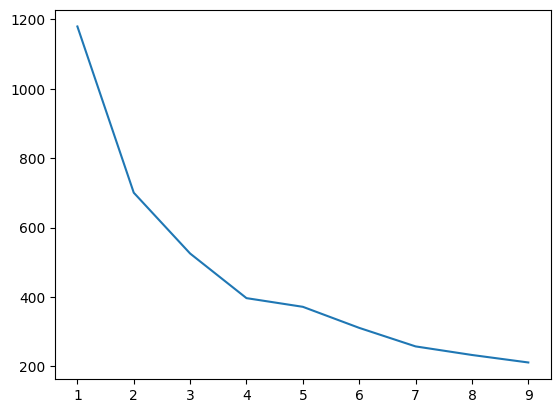

In [17]:
inertias = []

for i in range(1, 10):
  m = KMeans(i, n_init='auto').fit(X1)
  inertias.append(m.inertia_)

plt.plot(range(1,10), inertias)

#### Второй датасет

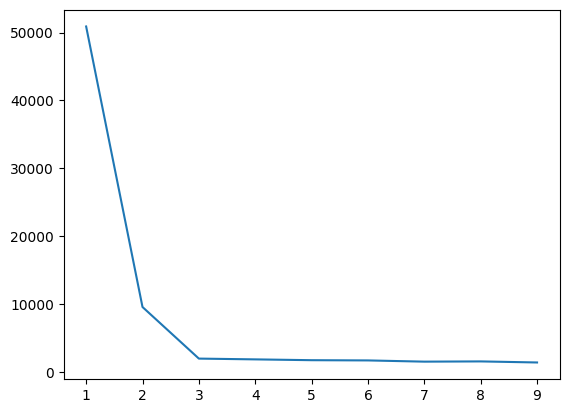

In [18]:
inertias = []

for i in range(1, 10):
  m = KMeans(i, n_init='auto').fit(X2)
  inertias.append(m.inertia_)

plt.plot(range(1,10), inertias)

#### Третий датасет

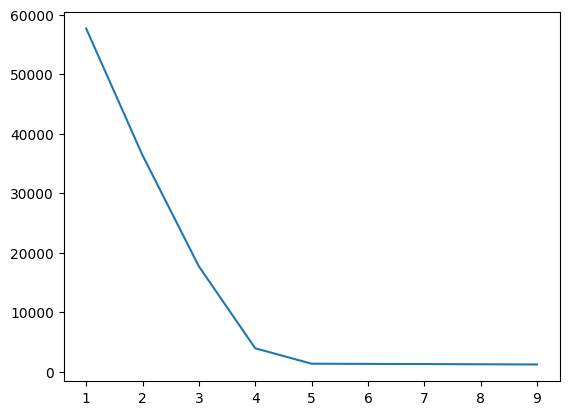

In [19]:
inertias = []

for i in range(1, 10):
  m = KMeans(i, n_init='auto').fit(X3)
  inertias.append(m.inertia_)

plt.plot(range(1,10), inertias)

### Метод силуэтов

#### Первый датасет

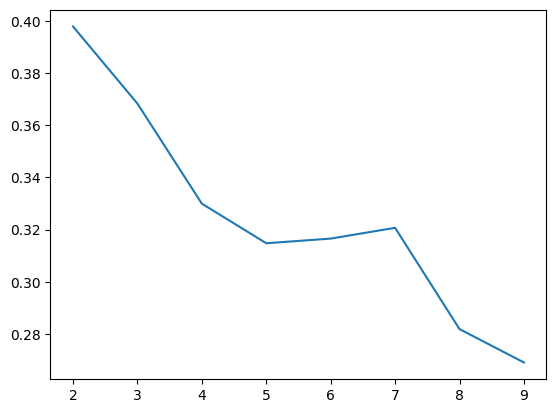

In [20]:
ss = []

for i in range(2, 10):
  ss.append(silhouette_score(X1, KMeans(i, n_init='auto').fit(X1).labels_))

plt.plot(range(2,10), ss)

#### Второй датасет

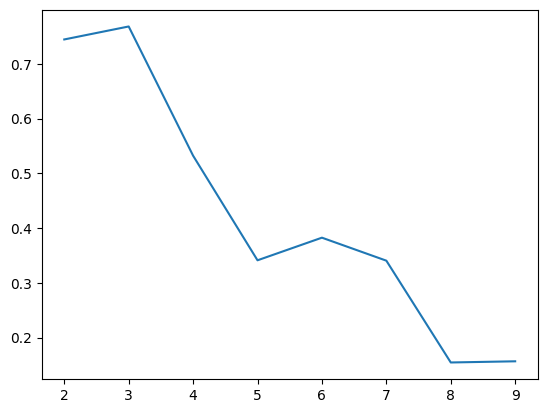

In [21]:
ss = []

for i in range(2, 10):
  ss.append(silhouette_score(X2, KMeans(i, n_init='auto').fit(X2).labels_))

plt.plot(range(2,10), ss)

#### Третий датасет

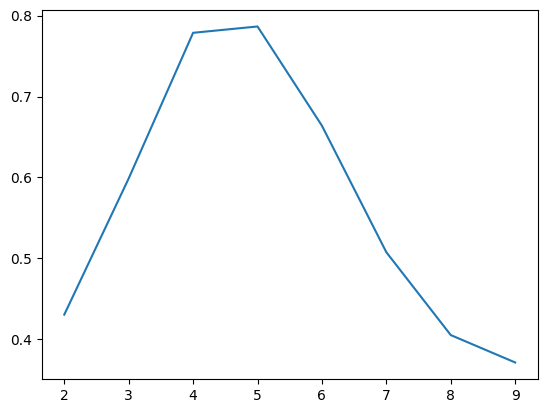

In [22]:
ss = []

for i in range(2, 10):
  ss.append(silhouette_score(X3, KMeans(i, n_init='auto').fit(X3).labels_))

plt.plot(range(2,10), ss)

### Заключение

Метод силуэтов показал себя чуть лучше, так как по нему проще определить число кластеров. По результатам: для первого датасета - 2 кластера, для второго - 3, для третьего - 5.

## K-means

### Первый датасет

In [23]:
kmeans1 = KMeans(2, n_init='auto').fit(X1)

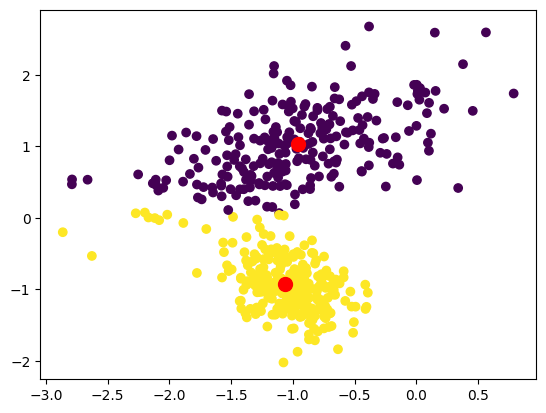

In [24]:
plt.scatter(X1[:,0], X1[:,1], c=kmeans1.labels_)
plt.scatter(kmeans1.cluster_centers_[:,0], kmeans1.cluster_centers_[:,1], s=100, c='red')

#### Метрики

In [25]:
metrics('K-means', kmeans1, X1, Y1)

K-means

Внутренние метрики
Силуэт: 0.39781881428472343
Индекс Дэвиса-Болдуина: 1.06077136905463

Внешние метрики
Индекс RAND: 0.9304529058116232
Индекс Фоулкса – Мэллова 0.9304091226241625


### Второй датасет

In [26]:
kmeans2 = KMeans(3, n_init='auto').fit(X2)

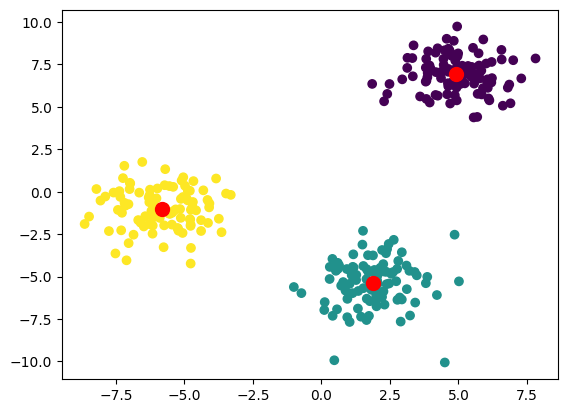

In [27]:
plt.scatter(X2[:,0], X2[:,1], c=kmeans2.labels_)
plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1], s=100, c='red')

#### Метрики

In [28]:
metrics('K-means', kmeans2, X2, Y2)

K-means

Внутренние метрики
Силуэт: 0.7682327484780341
Индекс Дэвиса-Болдуина: 0.3370157110126761

Внешние метрики
Индекс RAND: 1.0
Индекс Фоулкса – Мэллова 1.0


### Третий датасет

In [29]:
kmeans3 = KMeans(5, n_init='auto').fit(X3)

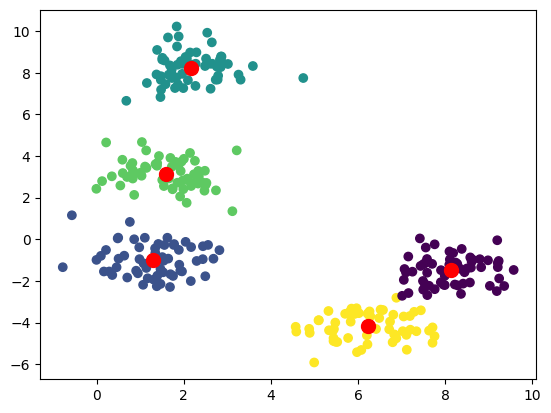

In [30]:
plt.scatter(X3[:,0], X3[:,1], c=kmeans3.labels_)
plt.scatter(kmeans3.cluster_centers_[:,0], kmeans3.cluster_centers_[:,1], s=100, c='red')

#### Метрики

In [31]:
metrics('K-means', kmeans3, X3, Y3)

K-means

Внутренние метрики
Силуэт: 0.7866124005339178
Индекс Дэвиса-Болдуина: 0.30789064578823616

Внешние метрики
Индекс RAND: 1.0
Индекс Фоулкса – Мэллова 1.0


## AffinityPropagation

### Первый датасет

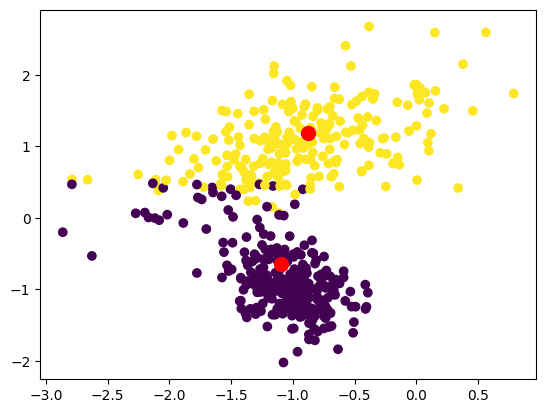

In [32]:
ap1 = AffinityPropagation(preference=-400).fit(X1)

plt.scatter(X1[:,0], X1[:,1], c=ap1.labels_)
plt.scatter(ap1.cluster_centers_[:,0], ap1.cluster_centers_[:,1], s=100, c='red')

#### Метрики

In [33]:
metrics('AffinityPropagation', ap1, X1, Y1)

AffinityPropagation

Внутренние метрики
Силуэт: 0.3880145122667424
Индекс Дэвиса-Болдуина: 1.0769682644782812

Внешние метрики
Индекс RAND: 0.8695390781563126
Индекс Фоулкса – Мэллова 0.8702387090291924


### Второй датасет

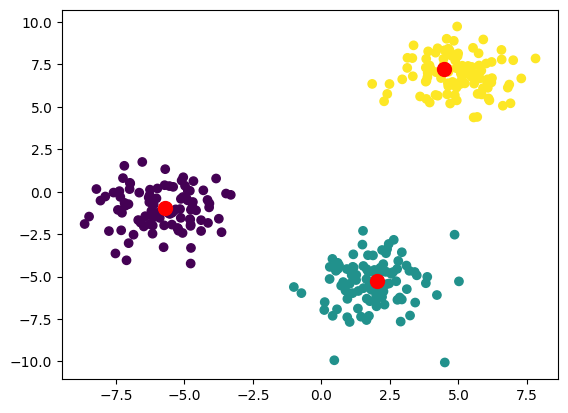

In [34]:
ap2 = AffinityPropagation(preference=-200).fit(X2)

plt.scatter(X2[:,0], X2[:,1], c=ap2.labels_)
plt.scatter(ap2.cluster_centers_[:,0], ap2.cluster_centers_[:,1], s=100, c='red')

#### Метрики

In [35]:
metrics('AffinityPropagation', ap2, X2, Y2)

AffinityPropagation

Внутренние метрики
Силуэт: 0.7682327484780341
Индекс Дэвиса-Болдуина: 0.3370157110126761

Внешние метрики
Индекс RAND: 1.0
Индекс Фоулкса – Мэллова 1.0


### Третий датасет

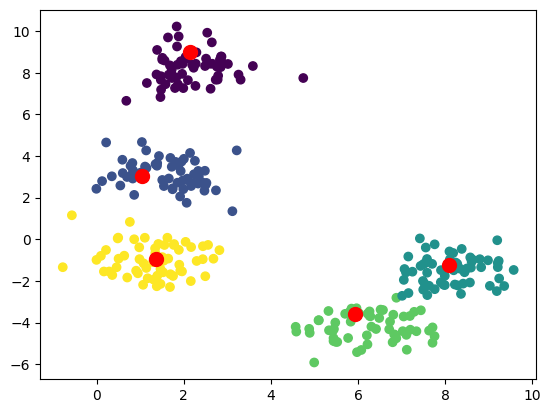

In [36]:
ap3 = AffinityPropagation(preference=-100).fit(X3)

plt.scatter(X3[:,0], X3[:,1], c=ap3.labels_)
plt.scatter(ap3.cluster_centers_[:,0], ap3.cluster_centers_[:,1], s=100, c='red')

#### Метрики

In [37]:
metrics('AffinityPropagation', ap3, X3, Y3)

AffinityPropagation

Внутренние метрики
Силуэт: 0.7866124005339178
Индекс Дэвиса-Болдуина: 0.30789064578823616

Внешние метрики
Индекс RAND: 1.0
Индекс Фоулкса – Мэллова 1.0


## DBSCAN

### Подбор гиперпараметров

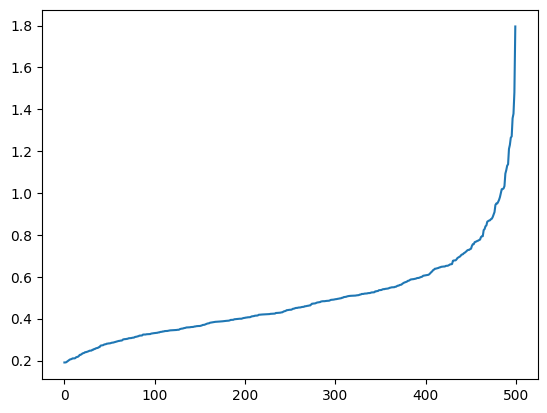

In [38]:
from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors=25).fit(X1)
distances, indices = nbrs.kneighbors(X1)
distances = np.mean(distances, axis=1)
distances = np.sort(distances)
# distances
plt.plot(distances)

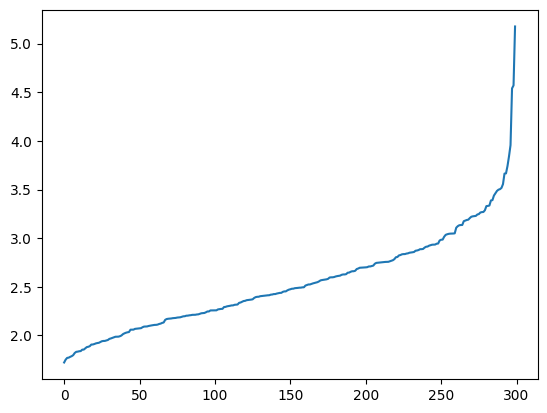

In [39]:
from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors=43).fit(X2)
distances, indices = nbrs.kneighbors(X2)
distances = np.mean(distances, axis=1)
distances = np.sort(distances)
# distances
plt.plot(distances)

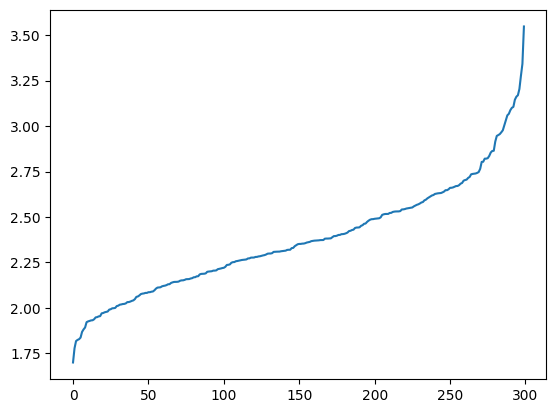

In [40]:
from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors=33).fit(X3)
distances, indices = nbrs.kneighbors(X3)
distances = np.mean(distances, axis=1)
distances = np.sort(distances)
# distances
plt.plot(distances)

### Первый датасет

In [41]:
dbs1 = DBSCAN(eps=0.6, min_samples=50).fit(X1)

[-1  0]


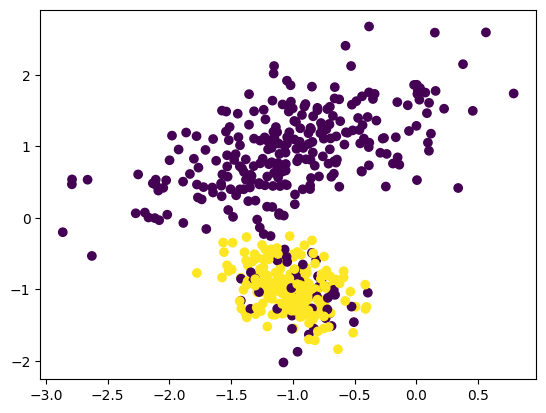

In [42]:
print(np.unique(dbs1.labels_))
plt.scatter(X1[:,0], X1[:,1], c=dbs1.labels_)

#### Метрики

In [43]:
metrics('DBSCAN', dbs1, X1, Y1)

DBSCAN

Внутренние метрики
Силуэт: 0.2947948952718122
Индекс Дэвиса-Болдуина: 1.3118844154461906

Внешние метрики
Индекс RAND: 0.794501002004008
Индекс Фоулкса – Мэллова 0.7984708014683991


### Второй датасет

In [44]:
dbs2 = DBSCAN(eps=3.2).fit(X2)

[-1  0  1  2]


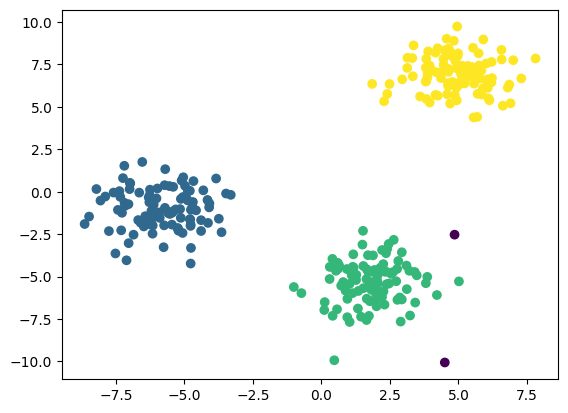

In [45]:
print(np.unique(dbs2.labels_))
plt.scatter(X2[:,0], X2[:,1], c=dbs2.labels_)

#### Метрики

In [46]:
metrics('DBSCAN', dbs2, X2, Y2)

DBSCAN

Внутренние метрики
Силуэт: 0.6563093370640098
Индекс Дэвиса-Болдуина: 1.0852565492853743

Внешние метрики
Индекс RAND: 0.9956298773690078
Индекс Фоулкса – Мэллова 0.9933787529443877


### Третий датасет

In [47]:
dbs3 = DBSCAN(eps=2.75).fit(X3)

[0 1 2 3 4]


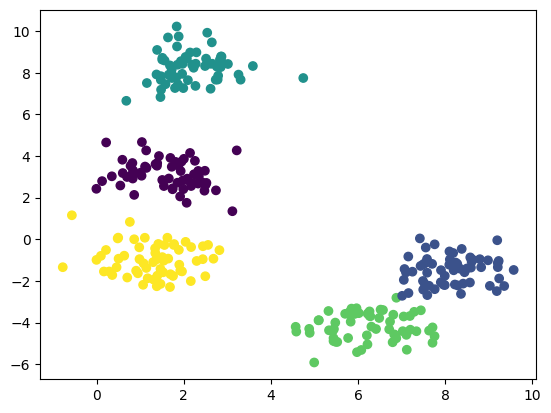

In [48]:
print(np.unique(dbs3.labels_))
plt.scatter(X3[:,0], X3[:,1], c=dbs3.labels_)

#### Метрики

In [49]:
metrics('DBSCAN', dbs3, X3, Y3)

DBSCAN

Внутренние метрики
Силуэт: 0.7866124005339178
Индекс Дэвиса-Болдуина: 0.30789064578823616

Внешние метрики
Индекс RAND: 1.0
Индекс Фоулкса – Мэллова 1.0


## Gaussian Mixtures

### Первый датасет

In [50]:
gm = GaussianMixture(n_components=2).fit(X1)

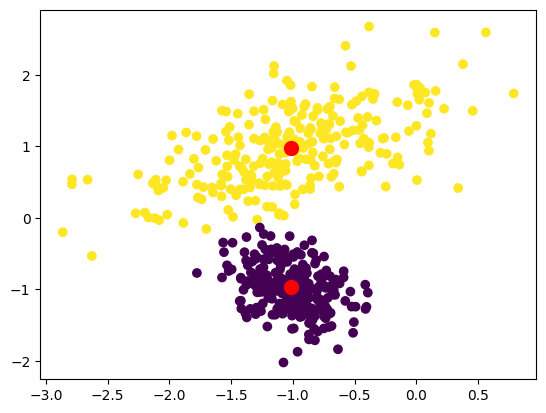

In [51]:
plt.scatter(X1[:,0], X1[:,1], c=gm.predict(X1))
plt.scatter(gm.means_[:,0], gm.means_[:,1], s=100, c='red')

#### Метрики

In [52]:
metrics('GaussianMixture', gm, X1, Y1)

GaussianMixture

Внутренние метрики
Силуэт: 0.3941753078347178
Индекс Дэвиса-Болдуина: 1.0673051524352686

Внешние метрики
Индекс RAND: 0.9684488977955912
Индекс Фоулкса – Мэллова 0.9683860500232929


### Второй датасет

In [53]:
gm2 = GaussianMixture(n_components=3).fit(X2)

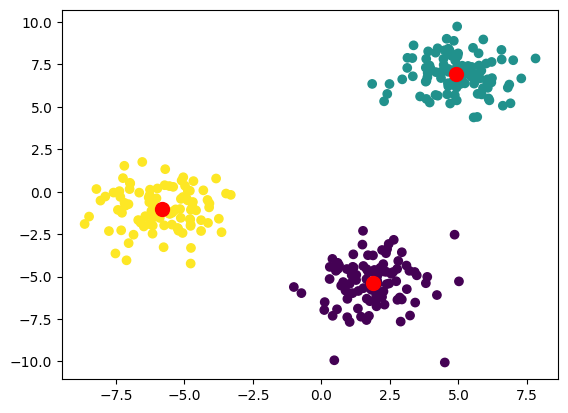

In [54]:
plt.scatter(X2[:,0], X2[:,1], c=gm2.predict(X2))
plt.scatter(gm2.means_[:,0], gm2.means_[:,1], s=100, c='red')

#### Метрики

In [55]:
metrics('GaussianMixture', gm2, X2, Y2)

GaussianMixture

Внутренние метрики
Силуэт: 0.7682327484780341
Индекс Дэвиса-Болдуина: 0.3370157110126761

Внешние метрики
Индекс RAND: 1.0
Индекс Фоулкса – Мэллова 1.0


### Третий датасет

In [56]:
gm3 = GaussianMixture(n_components=5).fit(X3)

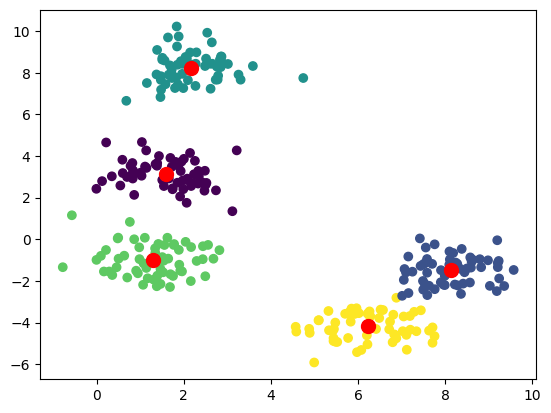

In [57]:
plt.scatter(X3[:,0], X3[:,1], c=gm3.predict(X3))
plt.scatter(gm3.means_[:,0], gm3.means_[:,1], s=100, c='red')

#### Метрики

In [58]:
metrics('GaussianMixture', gm3, X3, Y3)

GaussianMixture

Внутренние метрики
Силуэт: 0.7866124005339178
Индекс Дэвиса-Болдуина: 0.30789064578823616

Внешние метрики
Индекс RAND: 1.0
Индекс Фоулкса – Мэллова 1.0


## Иерархическая кластеризация

### Первый датасет

In [59]:
ag1 = AgglomerativeClustering(n_clusters=2, linkage="ward").fit(X1)

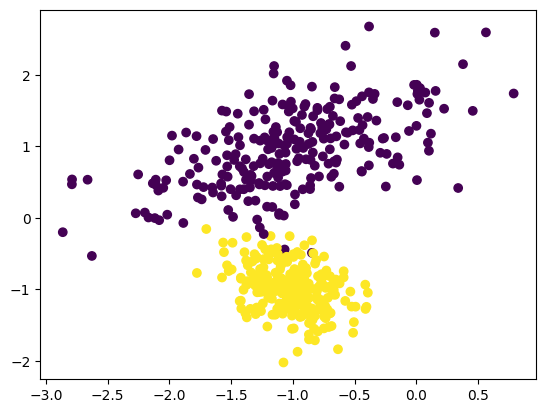

In [60]:
plt.scatter(X1[:,0], X1[:,1], c=ag1.labels_)

#### Метрики

In [61]:
metrics('Hierarchy', ag1, X1, Y1)

Hierarchy

Внутренние метрики
Силуэт: 0.39087782767119
Индекс Дэвиса-Болдуина: 1.0721489200962107

Внешние метрики
Индекс RAND: 0.949250501002004
Индекс Фоулкса – Мэллова 0.9491555438819886


### Второй датасет

In [62]:
ag2 = AgglomerativeClustering(n_clusters=3, linkage="ward").fit(X2)

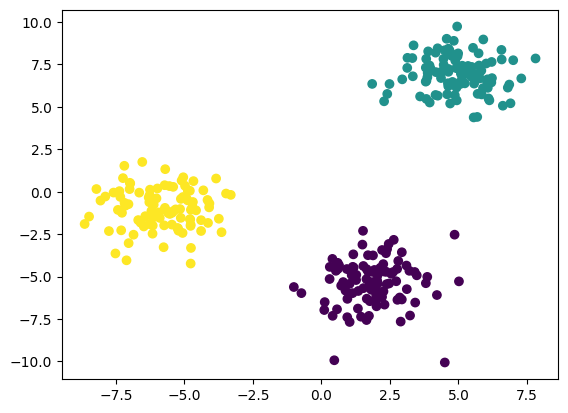

In [63]:
plt.scatter(X2[:,0], X2[:,1], c=ag2.labels_)

#### Метрики

In [64]:
metrics('Hierarchy', ag2, X2, Y2)

Hierarchy

Внутренние метрики
Силуэт: 0.7682327484780341
Индекс Дэвиса-Болдуина: 0.3370157110126761

Внешние метрики
Индекс RAND: 1.0
Индекс Фоулкса – Мэллова 1.0


### Третий датасет

In [65]:
ag3 = AgglomerativeClustering(n_clusters=5, linkage="ward").fit(X3)

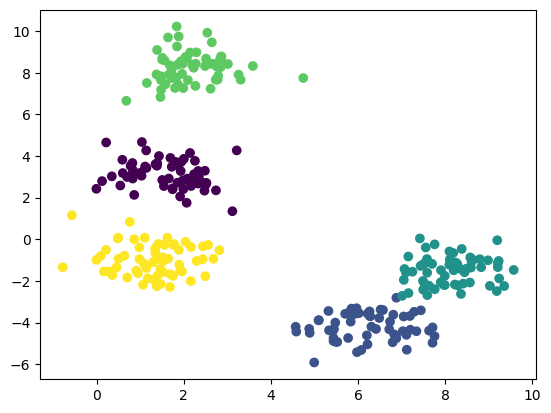

In [66]:
plt.scatter(X3[:,0], X3[:,1], c=ag3.labels_)

#### Метрики

In [67]:
metrics('Hierarchy', ag3, X3, Y3)

Hierarchy

Внутренние метрики
Силуэт: 0.7866124005339178
Индекс Дэвиса-Болдуина: 0.3078906457882362

Внешние метрики
Индекс RAND: 1.0
Индекс Фоулкса – Мэллова 1.0


In [68]:
# Добавить ещё методы класетризации

# Задание №2

## Обработка датасета из задания №4

In [69]:
df = pd.read_csv('../data/Lab4_Mrdak_MO-221.csv')

In [70]:
df

,Unnamed: 0,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,0,(2011 GZ2),0.016016,0.035813,56014.078517,1.024333e+06,26.10,0
1,1,(2020 HT6),0.030518,0.068240,7864.348060,3.268186e+07,24.70,0
2,2,(2016 ED156),0.055533,0.124177,55257.544508,6.538636e+07,23.40,0
3,3,(2013 FD8),0.019256,0.043057,41531.404722,1.260796e+07,25.70,0
4,4,(2016 CW31),0.139494,0.311918,67639.394481,7.130590e+07,21.40,0
...,...,...,...,...,...,...,...,...
81565,90830,(2019 GF1),0.008405,0.018795,8424.366481,3.821292e+06,27.50,0
81566,90831,(2021 YE),0.017561,0.039268,23264.740825,1.635007e+06,25.90,0
81567,90832,(2018 KL),0.110804,0.247765,24802.519406,3.351901e+07,21.90,0
81568,90834,(2014 SQ260),0.044112,0.098637,45763.317060,2.694877e+07,23.90,0


In [71]:
df = df.drop(['Unnamed: 0', 'name'], axis=1)
df

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,0.016016,0.035813,56014.078517,1.024333e+06,26.10,0
1,0.030518,0.068240,7864.348060,3.268186e+07,24.70,0
2,0.055533,0.124177,55257.544508,6.538636e+07,23.40,0
3,0.019256,0.043057,41531.404722,1.260796e+07,25.70,0
4,0.139494,0.311918,67639.394481,7.130590e+07,21.40,0
...,...,...,...,...,...,...
81565,0.008405,0.018795,8424.366481,3.821292e+06,27.50,0
81566,0.017561,0.039268,23264.740825,1.635007e+06,25.90,0
81567,0.110804,0.247765,24802.519406,3.351901e+07,21.90,0
81568,0.044112,0.098637,45763.317060,2.694877e+07,23.90,0


In [72]:
y = df["hazardous"]
X = df.drop(["hazardous"], axis=1)

In [73]:
y = y[55000:55500]
X = X[55000:55500]

In [74]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y)

In [75]:
#smote = SMOTE()
#X_train, y_train = smote.fit_resample(X_train, y_train)

## Обучение

### K-means

#### Подбор гиперпараметров

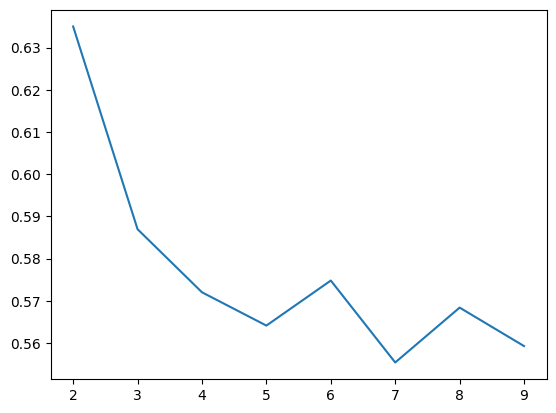

In [76]:
ss = []

for i in range(2, 10):
  ss.append(silhouette_score(X, KMeans(i, n_init='auto').fit(X).labels_))

plt.plot(range(2,10), ss)

In [77]:
from sklearn.cluster import KMeans

kmeans = KMeans(2, n_init='auto')

label = kmeans.fit_predict(X)

In [78]:
label_0 = X[label == 0]
label_1 = X[label == 1]

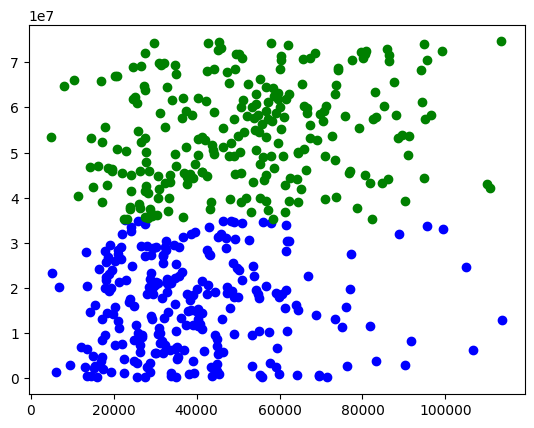

In [79]:
cols = X.columns
plt.scatter(label_0[cols[2]] , label_0[cols[3]], color = 'blue')
plt.scatter(label_1[cols[2]] , label_1[cols[3]], color = 'green')
plt.show()

In [80]:
metrics('K-Mmeans', kmeans, X, y)

K-Mmeans

Внутренние метрики
Силуэт: 0.6350809279241176
Индекс Дэвиса-Болдуина: 0.48709585642441255

Внешние метрики
Индекс RAND: 0.4990701402805611
Индекс Фоулкса – Мэллова 0.6546491843295406


### DBSCAN

#### Подбор гиперпараметров

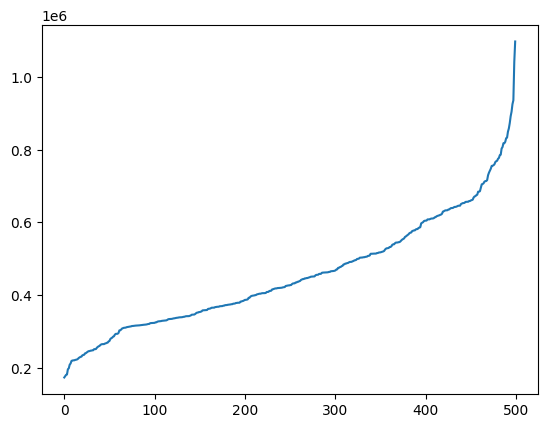

In [81]:
from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors=13).fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.mean(distances, axis=1)
distances = np.sort(distances)
# distances
plt.plot(distances)

In [82]:
dbs = DBSCAN(eps=800000)
label = dbs.fit_predict(X)

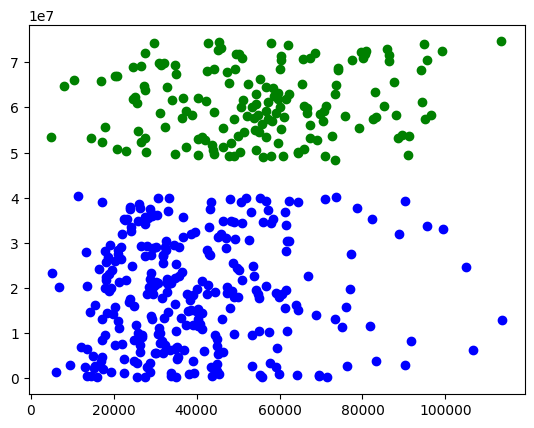

In [83]:
label_0 = X[label == 0]
label_1 = X[label == 1]

cols = X.columns
plt.scatter(label_0[cols[2]] , label_0[cols[3]], color = 'blue')
plt.scatter(label_1[cols[2]] , label_1[cols[3]], color = 'green')
plt.show()

In [84]:
metrics('DBSCAN', dbs, X, y)

DBSCAN

Внутренние метрики
Силуэт: 0.38583002444671377
Индекс Дэвиса-Болдуина: 0.47754286776511007

Внешние метрики
Индекс RAND: 0.46160320641282565
Индекс Фоулкса – Мэллова 0.6190331853397397


### Иерархическая кластеризация

In [85]:
ag = AgglomerativeClustering(n_clusters=2, linkage="ward")
label = ag.fit_predict(X)

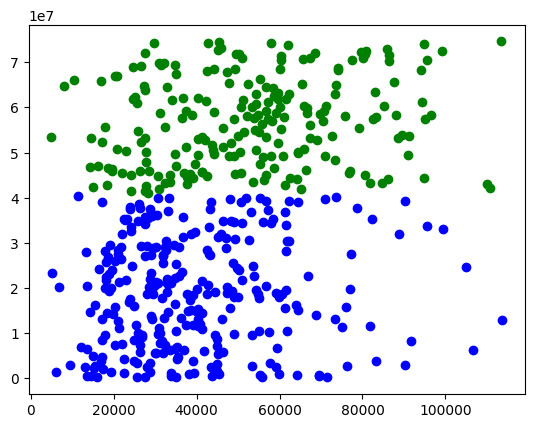

In [86]:
label_0 = X[label == 0]
label_1 = X[label == 1]

cols = X.columns
plt.scatter(label_0[cols[2]] , label_0[cols[3]], color = 'blue')
plt.scatter(label_1[cols[2]] , label_1[cols[3]], color = 'green')
plt.show()

In [87]:
metrics('Hierarchy', ag, X, y)

Hierarchy

Внутренние метрики
Силуэт: 0.6203700456622974
Индекс Дэвиса-Болдуина: 0.4892129794407523

Внешние метрики
Индекс RAND: 0.5077274549098196
Индекс Фоулкса – Мэллова 0.6623943327365716


## Заключение

По взятым метрикам видно, что хорошо себя показали модели, построенные с помощью алгоритмов K-means и Иерархической кластеризации, но модель, построенная с помощью K-means показала себя чуть лучше по всем метрикам.

In [88]:
import sys
sys.path.append("..")
from models.KMeans import myKMeans

In [89]:
mykmeans = myKMeans(k=3, max_iter=2000)

In [138]:
mykmeans.fit(X2)

label = mykmeans.predict(X2)
metrics('K-Mmeans',mykmeans, X2, Y2)

K-Mmeans

Внутренние метрики
Силуэт: 0.6236400950172674
Индекс Дэвиса-Болдуина: 0.4840813297496225

Внешние метрики
Индекс RAND: 0.921716833890747
Индекс Фоулкса – Мэллова 0.8821093035209794


In [136]:
label

array([2., 2., 1., 0., 2., 0., 2., 0., 1., 2., 1., 1., 1., 2., 2., 1., 0.,
       2., 2., 0., 2., 1., 1., 0., 2., 2., 2., 0., 1., 2., 1., 1., 1., 0.,
       0., 2., 0., 1., 0., 0., 2., 0., 2., 1., 2., 2., 0., 0., 2., 2., 0.,
       1., 2., 0., 0., 1., 0., 2., 1., 2., 2., 0., 1., 0., 1., 2., 1., 2.,
       0., 0., 2., 0., 2., 1., 0., 1., 1., 0., 2., 1., 0., 0., 2., 2., 1.,
       2., 2., 2., 2., 1., 0., 2., 1., 2., 0., 1., 2., 1., 1., 2., 0., 0.,
       2., 2., 0., 2., 0., 0., 2., 0., 2., 0., 0., 1., 0., 0., 0., 1., 2.,
       1., 2., 1., 2., 0., 0., 1., 2., 2., 0., 1., 1., 1., 1., 2., 0., 2.,
       1., 1., 0., 1., 1., 2., 2., 2., 2., 0., 1., 1., 2., 1., 0., 2., 2.,
       1., 0., 0., 0., 1., 0., 1., 1., 2., 1., 1., 0., 2., 1., 2., 2., 1.,
       0., 1., 0., 2., 1., 0., 2., 2., 2., 2., 2., 0., 0., 2., 0., 0., 1.,
       2., 1., 0., 2., 2., 0., 1., 1., 1., 2., 2., 2., 0., 0., 0., 0., 0.,
       1., 0., 2., 2., 2., 0., 1., 1., 0., 0., 2., 0., 0., 0., 0., 1., 2.,
       1., 2., 1., 0., 2.